In [82]:
import pandas as pd
import collections

In [83]:
# from google.colab import drive
# drive.mount('/content/drive')

In [84]:
###################pull new results from national lottery website and store locally##################################
import urllib.request
url = 'https://www.national-lottery.co.uk/results/euromillions/draw-history/csv'
filename = 'euromillions_new.csv'
urllib.request.urlretrieve(url, filename)

('euromillions_new.csv', <http.client.HTTPMessage at 0x7f2e65b732f0>)

In [85]:
new_df = pd.read_csv('./euromillions_new.csv')

In [86]:
main_df = pd.read_csv('./euromillions.csv')

In [87]:
main_df.rename(columns={"Date": "DrawDate"}, inplace=True)

In [88]:
main_df

,DrawDate,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Lucky Star 1,Lucky Star 2,DrawNumber
0,2025-10-17,13,35,39,44,47,3,5,1886
1,2025-10-14,5,8,14,16,18,3,10,1885
2,2025-10-10,6,7,17,20,21,1,10,1884
3,2025-10-07,24,39,42,43,48,5,8,1883
4,2025-10-03,6,12,18,25,41,2,6,1882
...,...,...,...,...,...,...,...,...,...
1881,2004-03-12,44,47,15,28,24,4,5,5
1882,2004-03-05,39,37,4,7,33,5,1,4
1883,2004-02-27,37,19,18,14,31,5,4,3
1884,2004-02-20,13,50,47,7,39,2,5,2


In [89]:
main_df["DrawDate"] = pd.to_datetime(main_df["DrawDate"], format='mixed')
new_df["DrawDate"] = pd.to_datetime(new_df["DrawDate"], format='mixed')

In [90]:
#main_df = main_df.drop(columns = ['UK Millionaire Maker'])
new_df = new_df.drop(columns = ['UK Millionaire Maker'])

In [91]:
main_df.set_index('DrawDate',inplace=True)
new_df.set_index('DrawDate',inplace=True)

In [92]:
original_df = pd.concat([main_df, new_df], axis=0, join = 'outer')

In [93]:
original_df.index.name='DrawDate'
original_df.drop_duplicates(keep='first', inplace=True, ignore_index=False)
original_df.sort_index(inplace = True, ascending = False)

In [94]:
original_df

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Lucky Star 1,Lucky Star 2,DrawNumber
DrawDate,,,,,,,,
2025-10-17,13,35,39,44,47,3,5,1886
2025-10-14,5,8,14,16,18,3,10,1885
2025-10-10,6,7,17,20,21,1,10,1884
2025-10-07,24,39,42,43,48,5,8,1883
2025-10-03,6,12,18,25,41,2,6,1882
...,...,...,...,...,...,...,...,...
2004-03-12,44,47,15,28,24,4,5,5
2004-03-05,39,37,4,7,33,5,1,4
2004-02-27,37,19,18,14,31,5,4,3


In [95]:
#################### create the list of lists #################################

In [96]:
#Creates a list of lists of the numbers in sorted order, and also a long list of all the numbers for the counter

def createLongList(df, set):
  if set == "main":
    jRangeLow = 0
    jRangeHigh = 5
  else:
    jRangeLow = 5
    jRangeHigh = 7
  #numbers is an array of arrays, each week a new array
  numbers = []
  #longlist has all the numbers in a row, to make the chart
  longList = []
  #i and j give the coordinates of the dataframe, going from the second from the left, hence j 1,6
  for i in range(len(df)):
    #print(i)
    tempList = []
    for j in range(jRangeLow, jRangeHigh):
      #print(i)
      #print(j)
      num = df.iloc[i][j]
      tempList.append(int(num))
      longList.append(int(num))
    tempList.sort()
    #templist is now an array of that weeks numbers, sorted
    numbers.append(tempList)
  return numbers, longList

In [97]:
###########creation of numbers, numbersLife##########################
numbers, longList = createLongList(original_df, "main")
numbersStars, longListStars = createLongList(original_df, "stars")

/tmp/ipykernel_347936/3008807686.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num = df.iloc[i][j]


In [98]:
counterNumbers = collections.Counter(longList)
counterStars = collections.Counter(longListStars)

In [99]:
def findMax(myDict):
  #find max value in dict
  numMax = 0
  for key in myDict:
    if myDict[key] > numMax:
      numMax = myDict[key]
  return numMax


#iterate through sortedNumMax list and if counterBalls[sortedNumMax] matches
#counterBalls[key], add it to the array. Then when finished, add array to array of arrays

def viewFrequency(myDict):
  occArr = []
  numMax = findMax(myDict)
  for x in range(1, (numMax+1)):
    #print(f"oSet: {x}")
    tempArr = []
    for key in myDict:
      if myDict[key] == x:
        tempArr.append(key)
        #print(key)
    if not tempArr:
      #if tempArr is empty, add a 0 as filler, or it ends up leaving it out
      tempArr.append(0)
    tempArr.sort()
    #add array to array of arrays
    occArr.append(tempArr)
  return occArr, numMax

In [100]:
occArr, numMax = viewFrequency(counterNumbers)
occArrStar, numMaxStar = viewFrequency(counterStars)

In [101]:
##finally, create the viewer by adding each array to it's corresponding occurence
def createViewer(arrOcc, nMax):
  viewDictAll = {}
  for x in range(1, (nMax + 1)):
    viewDictAll[x] = arrOcc[x-1]
  return viewDictAll

In [102]:
########################viewing dictionaries of occurence###################
viewDictAll = createViewer(occArr, numMax)
starsDictAll = createViewer(occArrStar, numMaxStar)

In [103]:
#####################viewing dictionaries for last 10 weeks##########################

In [104]:
def viewLastTen(ballSet):
  lastTen = []
  if ballSet == "Main":
    lastTen = numbers[:10]
  else:
    lastTen = numbersStars[:10]

  #turn lastTen into a counter...
  counterList = []
  for row in lastTen:
    for num in row:
      counterList.append(num)

  counter = collections.Counter(counterList)

  occArr, numMax = viewFrequency(counter)
  viewer = createViewer(occArr, numMax)
  return viewer
  #return "ook"


In [105]:
viewDictLastTen = viewLastTen("Main")
viewDictStarLastTen = viewLastTen("Star")

In [106]:
viewDictLastTen

{1: [1,
  3,
  4,
  5,
  7,
  9,
  10,
  11,
  12,
  14,
  15,
  16,
  20,
  21,
  26,
  28,
  29,
  32,
  33,
  40,
  41,
  43,
  47],
 2: [6, 18, 24, 25, 35, 39, 42, 44, 48],
 3: [8, 13, 17]}

In [107]:
##################how many this weeks balls are in previous weeks############################

#This returns how many of the balls in that week were in the last x many weeks
def compareTenBackend(numberList, startIndex, weeks):
  num = 0
  endIndex = startIndex + weeks
  tenthList = numberList[startIndex+1:endIndex]
  compareList = numberList[startIndex]

  isin = set([])
  for x in compareList:
    for y in range(0, len(tenthList)):
      if x in tenthList[y]: #this iterates through each array in tenthList
        isin.add(x)

  count = len(isin)
  return count

#write another function that calls compareTenBackend() in a loop, telling us for each week, how many of those balls are in
#the past 10 weeks balls
def compareNextTen(numberList, weeks):
  returnList = []
  for x in range(0,len(numberList)):
    num = compareTenBackend(numberList, x, weeks)
    returnList.append(num)
  return returnList


In [108]:
comparedTen = compareNextTen(numbers, 10)
comparedTenStars = compareNextTen(numbersStars, 10)

#this isn't meaningful
comparedFive = compareNextTen(numbers, 5)
comparedFiveStars = compareNextTen(numbersStars, 5)

#this is only meaningful for the stars
comparedSeven = compareNextTen(numbers, 7)
comparedSevenStars = compareNextTen(numbersStars, 7)

In [109]:
######################## Odd / Even ##############################

In [110]:
def oddEven(numbers):
  even = []
  odd = []
  # x is an array
  for x in numbers:
    evenTotal = 0
    oddTotal = 0
    # y is the number itself
    for y in x:
      if y % 2 == 0:
        evenTotal += 1
      else:
        oddTotal+=1
    even.append(evenTotal)
    odd.append(oddTotal)

  return even, odd

In [111]:
evenList, oddList = oddEven(numbers)
evenListStar, oddListStar = oddEven(numbersStars)

In [112]:
evenTenCounter = collections.Counter(evenList[:10])
evenCounter = collections.Counter(evenList)
evenStarTenCounter = collections.Counter(evenListStar[:10])
evenStarCounter = collections.Counter(evenListStar)

oddCounter = collections.Counter(oddList)

In [113]:
##########################Create a new dataframe, add columns and rename stuff####################

main_df = original_df.copy()

#list(main_df.columns.values) #list column names
#main_df['DrawDate'] = main_df.index # create column from index

main_df = main_df.rename(columns={"Lucky Star 1": "Star 1", "Lucky Star 2": "Star 2"})
main_df.head(3)
# main_df = main_df.rename(columns={"Ball 1": "B1", "Ball 2": "B2", "Ball 3": "B3", "Ball 4": "B4", "Ball 5": "B5", "Lucky Star 1": "S1", "Lucky Star 2": "S2"})

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Star 1,Star 2,DrawNumber
DrawDate,,,,,,,,
2025-10-17,13,35,39,44,47,3,5,1886
2025-10-14,5,8,14,16,18,3,10,1885
2025-10-10,6,7,17,20,21,1,10,1884


In [114]:
main_df['10Main'] = comparedTen
main_df['10Star'] = comparedTenStars
main_df['7Star'] = comparedSevenStars

In [115]:
main_df['OddM'] = oddList
main_df['EvenM'] = evenList
main_df['OddS'] = oddListStar
main_df['EvenS'] = evenListStar

In [116]:
#main_df.to_csv('drive/MyDrive/Colab Notebooks/Euromillions_out.csv', index=True)

In [117]:
main_df.head(5)

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Star 1,Star 2,DrawNumber,10Main,10Star,7Star,OddM,EvenM,OddS,EvenS
DrawDate,,,,,,,,,,,,,,,
2025-10-17,13,35,39,44,47,3,5,1886,4,2,2,4,1,2,0
2025-10-14,5,8,14,16,18,3,10,1885,3,2,1,1,4,1,1
2025-10-10,6,7,17,20,21,1,10,1884,2,0,0,3,2,1,1
2025-10-07,24,39,42,43,48,5,8,1883,5,2,2,2,3,1,1
2025-10-03,6,12,18,25,41,2,6,1882,2,2,2,2,3,0,2


In [118]:
############### is present ###########################################

In [119]:
# was that bucket in this weeks numbers?
def isPresent(numbers, numb):
  presentList = []
  for x in numbers:
    present = False
    for y in x:
      if y > (numb-1) and y < (numb+9):
        present = True
    if present == True:
      presentList.append("True")
    else:
      presentList.append("False")
  return presentList

In [120]:
presentList0 = isPresent(numbers, 0)
presentList10 = isPresent(numbers, 10)
presentList20 = isPresent(numbers, 20)
presentList30 = isPresent(numbers, 30)
presentList40 = isPresent(numbers, 40)
presentList30[:5]

['True', 'False', 'False', 'False', 'False']

In [121]:
def createDf(zero,one,two,three,four):
    df = original_df.copy()
    df = df.drop(columns = ['Ball 1',
  'Ball 2',
  'Ball 3',
  'Ball 4',
  'Ball 5',
  'Lucky Star 1',
  'Lucky Star 2'])
    print("ook")

    df['zeros'] = zero
    df['ones'] = one
    df['twos'] = two
    df['threes'] = three
    df['fours'] = four

    return df

In [122]:
def howManyPresent(numbers):
  zeroList = []
  tenList = []
  twentyList = []
  thirtyList = []
  fourtyList = []
  for row in numbers:
    zero = 0
    ten = 0
    twenty = 0
    thirty = 0
    fourty = 0

    for num in row:
      if num < 10:
        zero += 1
      if num > 9 and num < 20:
        ten += 1
      if num > 19 and num < 30:
        twenty += 1
      if num > 29 and num < 40:
        thirty += 1
      if num > 39 and num < 50:
        fourty += 1
    zeroList.append(zero)
    tenList.append(ten)
    twentyList.append(twenty)
    thirtyList.append(thirty)
    fourtyList.append(fourty)

  df = createDf(zeroList,tenList,twentyList,thirtyList,fourtyList)

  return df

In [123]:
present_df = howManyPresent(numbers)
present_df.head(5)

ook


,DrawNumber,zeros,ones,twos,threes,fours
DrawDate,,,,,,
2025-10-17,1886,0,1,0,2,2
2025-10-14,1885,2,3,0,0,0
2025-10-10,1884,2,1,2,0,0
2025-10-07,1883,0,0,1,1,3
2025-10-03,1882,1,2,1,0,1


In [124]:
#present_df.to_csv('drive/MyDrive/Colab Notebooks/Euromillions_present_out.csv', index=True)

In [125]:
#weeks since the 50 was out
def fifty(numbers):
  count = 0
  for x in numbers:
    for y in x:
      if y == 50:
        return count
        break
    count += 1
  return count
print(fifty(numbers))

29


In [126]:
list(original_df.columns.values)

['Ball 1',
 'Ball 2',
 'Ball 3',
 'Ball 4',
 'Ball 5',
 'Lucky Star 1',
 'Lucky Star 2',
 'DrawNumber']

In [127]:
#return a dictionary which the key as the ball number and the value as the last time the ball came out, in number of draws ago
def lastSeen(numbers, set):
  lastSeenDict = {}
  if set == "main":
    r = 48
  else:
    r = 13
  for num in range(1,r):
    #print(num)
    counter = 1
    for row in numbers:
      if num in row:
        lastSeenDict[num]= counter
        break
      else:
        counter += 1
  return lastSeenDict

lastSeenDict = lastSeen(numbers, "main")

In [128]:
lastSeenStarDict = lastSeen(numbersStars, "life")

In [129]:
###################################time between life balls coming out##############################################

#longest time between star ball coming out ever

def timeSinceBallAppeared(ball):
  times = 0
  counter = 0
  for row in numbersStars:
    #print(row)
    if ball not in row:
      #print(f"{ball} not in {row}, counter is {counter}")
      counter += 1
    else:
      #print(f"{ball} is in {row}, counter is {counter}, resetting counter")
      if counter > times:
        times = counter
      counter = 0
  return times

def mostTimeBetween(lifeNumbers):
  mostTimeBetweenDict = {}
  for ball in range(1, 13):
    #print(ball)
    times = timeSinceBallAppeared(ball)
    mostTimeBetweenDict[ball] = times

  return mostTimeBetweenDict

mostTimeBetweenDict = mostTimeBetween(numbersStars)
mostTimeBetweenDict

{1: 31,
 2: 28,
 3: 23,
 4: 35,
 5: 30,
 6: 29,
 7: 26,
 8: 39,
 9: 31,
 10: 28,
 11: 40,
 12: 30}

In [130]:
#find average value of mostTimeBetweenDict
def findAverage(dicty):
  sum = 0
  count = 0
  for key in dicty:
    value = dicty[key]
    sum = sum + value
    count +=1
  mean = sum / count
  print(f"sum is {sum}, count is {count}, average is {mean}")

averageStarTimeBetween = findAverage(mostTimeBetweenDict)

sum is 370, count is 12, average is 30.833333333333332


In [131]:
main_df.drop(columns = ["DrawNumber"], inplace=True)
present_df.drop(columns = ["DrawNumber"], inplace=True)

In [132]:
main_df

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Star 1,Star 2,10Main,10Star,7Star,OddM,EvenM,OddS,EvenS
DrawDate,,,,,,,,,,,,,,
2025-10-17,13,35,39,44,47,3,5,4,2,2,4,1,2,0
2025-10-14,5,8,14,16,18,3,10,3,2,1,1,4,1,1
2025-10-10,6,7,17,20,21,1,10,2,0,0,3,2,1,1
2025-10-07,24,39,42,43,48,5,8,5,2,2,2,3,1,1
2025-10-03,6,12,18,25,41,2,6,2,2,2,2,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-03-12,44,47,15,28,24,4,5,1,2,2,2,3,1,1
2004-03-05,39,37,4,7,33,5,1,3,1,1,4,1,2,0
2004-02-27,37,19,18,14,31,5,4,0,1,1,3,2,1,1


In [133]:
present_df

,zeros,ones,twos,threes,fours
DrawDate,,,,,
2025-10-17,0,1,0,2,2
2025-10-14,2,3,0,0,0
2025-10-10,2,1,2,0,0
2025-10-07,0,0,1,1,3
2025-10-03,1,2,1,0,1
...,...,...,...,...,...
2004-03-12,0,1,2,0,2
2004-03-05,2,0,0,3,0
2004-02-27,0,3,0,2,0


In [134]:
##################################################make the dataframe############################################
all_df = main_df.join(present_df)
all_df.head(5)

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Star 1,Star 2,10Main,10Star,7Star,OddM,EvenM,OddS,EvenS,zeros,ones,twos,threes,fours
DrawDate,,,,,,,,,,,,,,,,,,,
2025-10-17,13,35,39,44,47,3,5,4,2,2,4,1,2,0,0,1,0,2,2
2025-10-14,5,8,14,16,18,3,10,3,2,1,1,4,1,1,2,3,0,0,0
2025-10-10,6,7,17,20,21,1,10,2,0,0,3,2,1,1,2,1,2,0,0
2025-10-07,24,39,42,43,48,5,8,5,2,2,2,3,1,1,0,0,1,1,3
2025-10-03,6,12,18,25,41,2,6,2,2,2,2,3,0,2,1,2,1,0,1


In [135]:
#all_df.to_csv('drive/MyDrive/Colab Notebooks/Euromillions_all.csv', index=True)

In [136]:
###########################Charts############################################

In [137]:
import matplotlib.pyplot as plt

In [138]:
def plot_dictionary_bar(dictionary, x, title):
  keys = dictionary.keys()
  values = dictionary.values()
  plt.bar(keys, values)
  plt.xlabel(x)
  plt.ylabel('Occurrence')
  plt.title(title)

  plt.show()

In [139]:
def plot_dictionary_bar_y(dictionary, x, y, title):
  keys = dictionary.keys()
  values = dictionary.values()
  plt.bar(keys, values)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.title(title)
  plt.show()

In [140]:
counterLastTen = collections.Counter(comparedTen)
counterLastTen

Counter({3: 678, 4: 524, 2: 395, 5: 141, 1: 131, 0: 17})

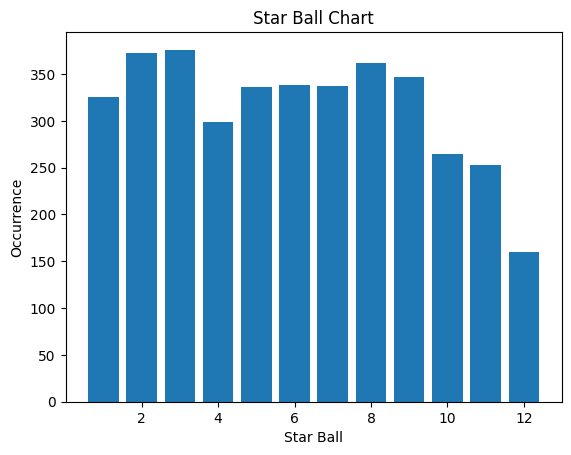

In [141]:
plot_dictionary_bar(counterStars, "Star Ball", "Star Ball Chart")

In [142]:
all_df.head(60)

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Star 1,Star 2,10Main,10Star,7Star,OddM,EvenM,OddS,EvenS,zeros,ones,twos,threes,fours
DrawDate,,,,,,,,,,,,,,,,,,,
2025-10-17,13,35,39,44,47,3,5,4,2,2,4,1,2,0,0,1,0,2,2
2025-10-14,5,8,14,16,18,3,10,3,2,1,1,4,1,1,2,3,0,0,0
2025-10-10,6,7,17,20,21,1,10,2,0,0,3,2,1,1,2,1,2,0,0
2025-10-07,24,39,42,43,48,5,8,5,2,2,2,3,1,1,0,0,1,1,3
2025-10-03,6,12,18,25,41,2,6,2,2,2,2,3,0,2,1,2,1,0,1
2025-09-30,3,8,15,17,48,2,8,3,2,2,3,2,0,2,2,2,0,0,1
2025-09-26,4,17,25,28,44,5,11,0,2,2,2,3,2,0,1,1,2,0,1
2025-09-23,11,13,24,29,33,2,5,2,2,2,4,1,1,1,0,2,2,1,0
2025-09-19,8,10,26,32,42,9,12,3,1,1,0,5,1,1,1,1,1,1,1


In [143]:
viewDictLastTen

{1: [1,
  3,
  4,
  5,
  7,
  9,
  10,
  11,
  12,
  14,
  15,
  16,
  20,
  21,
  26,
  28,
  29,
  32,
  33,
  40,
  41,
  43,
  47],
 2: [6, 18, 24, 25, 35, 39, 42, 44, 48],
 3: [8, 13, 17]}

In [154]:
#viewDictAll

In [145]:
viewDictStarLastTen

{1: [1, 9, 11, 12], 2: [3, 6, 8, 10], 3: [2], 4: [0], 5: [5]}

In [155]:
#starsDictAll

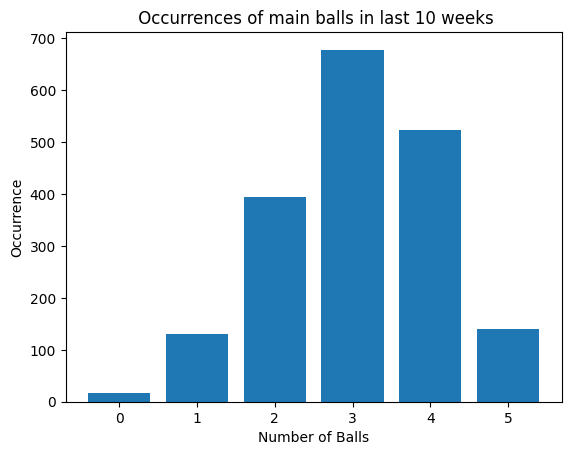

In [147]:
plot_dictionary_bar(counterLastTen, "Number of Balls", " Occurrences of main balls in last 10 weeks")

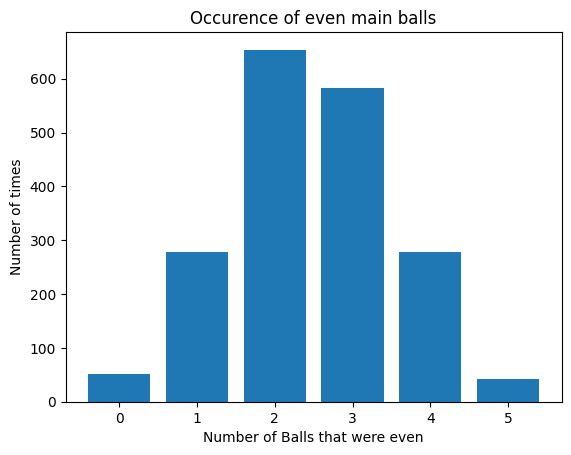

In [148]:
# evenTenCounter
# evenCounter
# evenStarTenCounter
# evenTenCounter
plot_dictionary_bar_y(evenCounter, "Number of Balls that were even", "Number of times", "Occurence of even main balls")

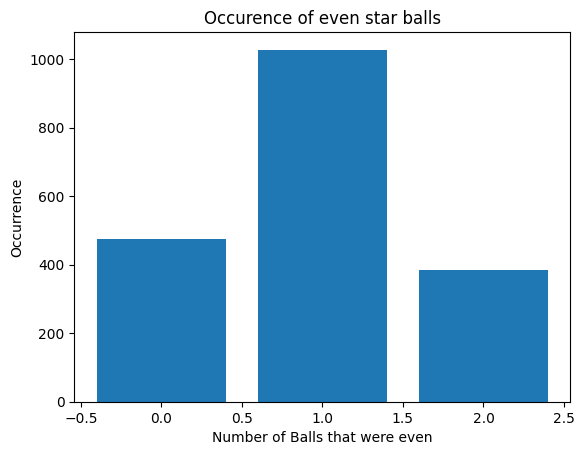

In [149]:
#plot_dictionary_bar(oddCounter, "Number of Balls that were odd", "Occurence of odd balls")
plot_dictionary_bar(evenStarCounter, "Number of Balls that were even", "Occurence of even star balls")


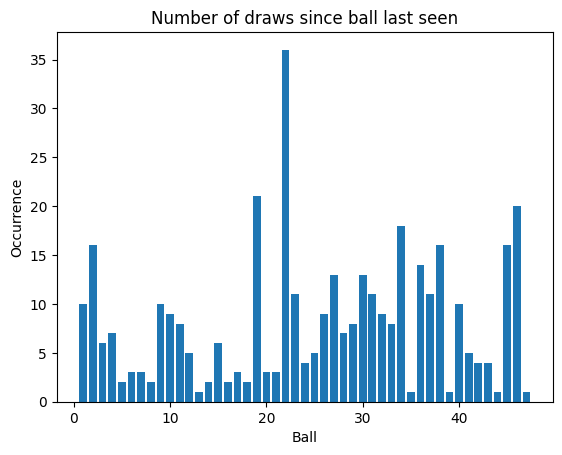

In [150]:
plot_dictionary_bar(lastSeenDict, "Ball", "Number of draws since ball last seen")

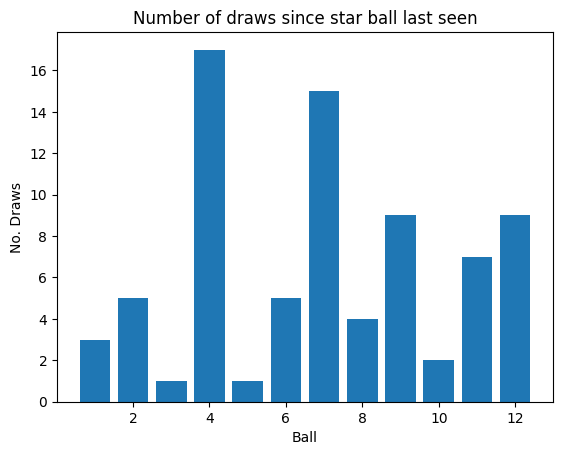

In [151]:
plot_dictionary_bar_y(lastSeenStarDict, "Ball", "No. Draws", "Number of draws since star ball last seen")

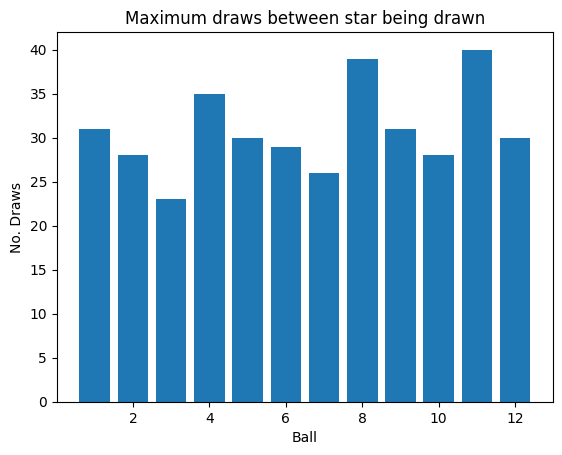

In [152]:
plot_dictionary_bar_y(mostTimeBetweenDict, "Ball", "No. Draws", "Maximum draws between star being drawn")

In [153]:
numbers

[[13, 35, 39, 44, 47],
 [5, 8, 14, 16, 18],
 [6, 7, 17, 20, 21],
 [24, 39, 42, 43, 48],
 [6, 12, 18, 25, 41],
 [3, 8, 15, 17, 48],
 [4, 17, 25, 28, 44],
 [11, 13, 24, 29, 33],
 [8, 10, 26, 32, 42],
 [1, 9, 13, 35, 40],
 [5, 10, 23, 31, 37],
 [3, 13, 24, 39, 40],
 [27, 30, 31, 41, 43],
 [13, 30, 31, 32, 36],
 [6, 9, 10, 13, 37],
 [2, 14, 38, 42, 45],
 [6, 9, 12, 30, 39],
 [24, 31, 34, 41, 43],
 [13, 30, 35, 36, 40],
 [18, 28, 42, 46, 48],
 [2, 12, 19, 34, 44],
 [1, 3, 5, 42, 47],
 [4, 16, 25, 29, 30],
 [5, 6, 42, 44, 46],
 [6, 7, 23, 32, 36],
 [8, 15, 26, 33, 41],
 [13, 19, 25, 42, 45],
 [24, 38, 41, 45, 49],
 [8, 23, 24, 45, 49],
 [1, 8, 9, 18, 50],
 [19, 29, 42, 45, 48],
 [1, 17, 28, 32, 34],
 [19, 27, 36, 45, 49],
 [7, 16, 21, 23, 39],
 [5, 8, 24, 37, 47],
 [13, 22, 23, 44, 49],
 [2, 28, 40, 43, 45],
 [19, 36, 39, 40, 45],
 [20, 21, 29, 30, 35],
 [12, 15, 38, 47, 48],
 [4, 7, 14, 33, 36],
 [12, 30, 38, 40, 41],
 [10, 29, 43, 46, 49],
 [1, 8, 13, 29, 47],
 [6, 9, 25, 37, 46],
 [9, 19,